In [2]:
#Add Matplotlib inline magic command
%matplotlib inline

#Import Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [4]:
#Read city data file and store in DataFrame
city_data_df=pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [5]:
#Read ride data fiel and store in DataFrame
ride_data_df=pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [6]:
#Get the number of columns
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [7]:
#Get the number of rows that are not null
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [8]:
#Get the data types of each column
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [9]:
#Get the unique values of the type of city 
city_data_df["type"].value_counts()

Urban       66
Suburban    36
Rural       18
Name: type, dtype: int64

In [10]:
#Get the columns and rows that are not null
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [11]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [12]:
#Get the data types of each column 
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [13]:
#Combine the data into a single dataset
pyber_data_df=pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [14]:
#Create 3 different DataFrames for the city type
urban_cities_df = pyber_data_df[pyber_data_df["type"]=="Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"]=="Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"]=="Rural"]

In [15]:
#get the number of rides for each type of city  
urban_ride_count=urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count=suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count=rural_cities_df.groupby(["city"]).count()["ride_id"]

In [16]:
#Get the average fare for each city in the urban cities
urban_average_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_average_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_average_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [17]:
#Get the average number od drivers for each city
urban_driver_count=urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count=suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count=rural_cities_df.groupby(["city"]).mean()["driver_count"]

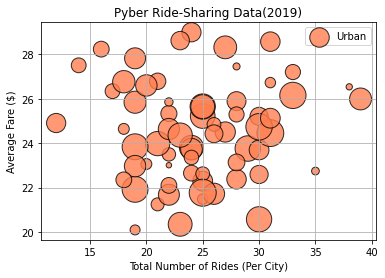

In [18]:
#Build the scatter plots for urban cities 
plt.scatter(urban_ride_count, urban_average_fare, 
            c="coral", 
            s=10*urban_driver_count, 
            edgecolor="black",
            alpha=0.8, 
            label="Urban" )
plt.title("Pyber Ride-Sharing Data(2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)
plt.legend()

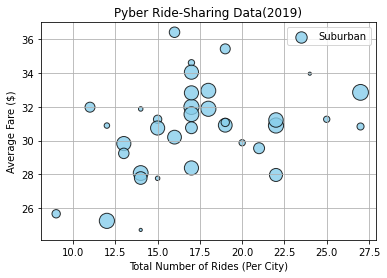

In [19]:
#Build the scatter plots for surban cities 
plt.scatter(suburban_ride_count, suburban_average_fare, 
            c="skyblue", 
            s=10*suburban_driver_count, 
            edgecolor="black",
            alpha=0.8, 
            label="Suburban" )
plt.title("Pyber Ride-Sharing Data(2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)
plt.legend()

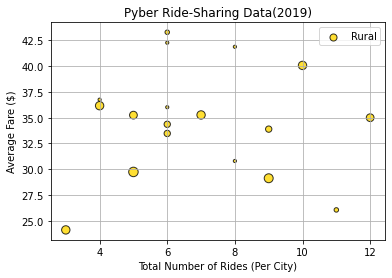

In [20]:
#Build the scatter plots for rural cities 
plt.scatter(rural_ride_count, rural_average_fare, 
            c="gold", 
            s=10*rural_driver_count, 
            edgecolor="black",
            alpha=0.8, 
            label="Rural" )
plt.title("Pyber Ride-Sharing Data(2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)
plt.legend()

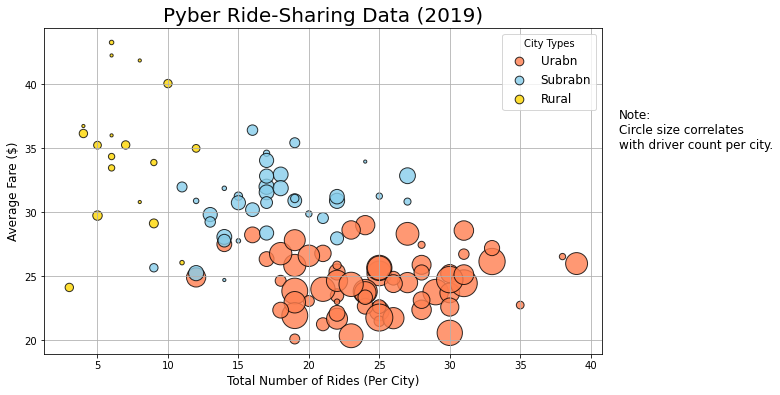

In [21]:
#Add the scatter charts for each type of city
plt.subplots(figsize=(10,6))
plt.scatter(urban_ride_count, urban_average_fare, 
            s=10*urban_driver_count, 
            c="coral", 
            edgecolor="black", 
            linewidths=1, 
            alpha=0.8, 
            label="Urabn")
plt.scatter(suburban_ride_count, suburban_average_fare, 
            s=10*suburban_driver_count, 
            c="skyblue", 
            edgecolor="black", 
            linewidths=1, 
            alpha=0.8, 
            label="Subrabn")
plt.scatter(rural_ride_count, rural_average_fare, 
            s=10*rural_driver_count, 
            c="gold", 
            edgecolor="black", 
            linewidths=1, 
            alpha=0.8, 
            label="Rural")
plt.title("Pyber Ride-Sharing Data (2019)", fontsize=20)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.grid(True)

#Create legend
lgnd=plt.legend(fontsize="12", mode="Expanded", scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
plt.text(42, 35, "Note:\nCircle size correlates\nwith driver count per city.", fontsize="12")
plt.savefig("Analysis/Fig1.png")
plt.show()

In [22]:
#Get summary statistics for Urban cities
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [23]:
#Get summary statistics for Suburban cities
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [24]:
#Get summary statistics for Rural cities
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [25]:
#calculate the mean of the die count for each city type
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2),round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [26]:
#calculate the median of the die count for each city type
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2),round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [27]:
#calculate the mode of the die count for each city type
round(urban_ride_count.mode()), round(suburban_ride_count.mode()),round(rural_ride_count.mode())

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

In [28]:
#import NumPy and the stats module from SciPy
import numpy as np
import scipy.stats as sts

In [29]:
#calculate the measures of central tendency for the ride count 
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}")
median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {mean_urban_ride_count:.2f}")
mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mode_urban_ride_count}")

mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}")
median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}")
mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mode_suburban_ride_count}")

mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}")
median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for urban trips is {mean_rural_ride_count:.2f}")
mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mode_rural_ride_count}")

The mean for the ride counts for urban trips is 24.62
The median for the ride counts for urban trips is 24.62
The mean for the ride counts for urban trips is ModeResult(mode=array([22]), count=array([7]))
The mean for the ride counts for suburban trips is 17.36
The median for the ride counts for suburban trips is 17.36
The mean for the ride counts for suburban trips is ModeResult(mode=array([17]), count=array([7]))
The mean for the ride counts for rural trips is 6.94
The median for the ride counts for urban trips is 6.94
The mean for the ride counts for rural trips is ModeResult(mode=array([6]), count=array([5]))


In [30]:
#Get the fares for cities
urban_fares = urban_cities_df["fare"]
suburban_fares = suburban_cities_df["fare"]
rural_fares = rural_cities_df["fare"]

In [31]:
#calculate the meastures of central tendency for fares
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}")
median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}")
mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is ${mode_urban_fares}")

mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for urban trips is ${mean_suburban_fares:.2f}")
median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for urban trips is ${median_suburban_fares:.2f}")
mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for urban trips is ${mode_suburban_fares}")

mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for urban trips is ${mean_rural_fares:.2f}")
median_rural_fares = np.median(rural_fares)
print(f"The median fare price for urban trips is ${median_rural_fares:.2f}")
mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for urban trips is ${mode_rural_fares}")

The mean fare price for urban trips is $24.53
The median fare price for urban trips is $24.64
The mode fare price for urban trips is $ModeResult(mode=array([22.86]), count=array([5]))
The mean fare price for urban trips is $30.97
The median fare price for urban trips is $30.75
The mode fare price for urban trips is $ModeResult(mode=array([17.99]), count=array([3]))
The mean fare price for urban trips is $34.62
The median fare price for urban trips is $37.05
The mode fare price for urban trips is $ModeResult(mode=array([37.05]), count=array([2]))


In [32]:
#get the driver count for cities
urban_drivers = urban_cities_df["driver_count"]
suburban_drivers = suburban_cities_df["driver_count"]
rural_drivers = rural_cities_df["driver_count"]

In [33]:
#calculate the measures of central tendency for drivers
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean driver count for urban cities is {mean_urban_drivers:.0f}")
median_urban_drivers = np.median(urban_drivers)
print(f"The median driver count for urban cities is {median_urban_drivers:.0f}")
mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode driver count for urban cities is {mode_urban_drivers}")

mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean driver count for suburban cities is {mean_suburban_drivers:.0f}")
median_suburban_drivers = np.median(suburban_drivers)
print(f"The median driver for suburban cities is {median_suburban_drivers:.0f}")
mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mean fare price for suburban cities is {mode_suburban_drivers}")

mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean driver count for rural cities is {mean_rural_drivers:.0f}")
median_rural_drivers = np.median(rural_drivers)
print(f"The mean driver count for rural cities is {median_rural_drivers:.0f}")
mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode driver count for rural cities is {mode_rural_drivers}")

The mean driver count for urban cities is 37
The median driver count for urban cities is 37
The mode driver count for urban cities is ModeResult(mode=array([39]), count=array([86]))
The mean driver count for suburban cities is 14
The median driver for suburban cities is 16
The mean fare price for suburban cities is ModeResult(mode=array([20]), count=array([79]))
The mean driver count for rural cities is 4
The mean driver count for rural cities is 4
The mode driver count for rural cities is ModeResult(mode=array([1]), count=array([32]))


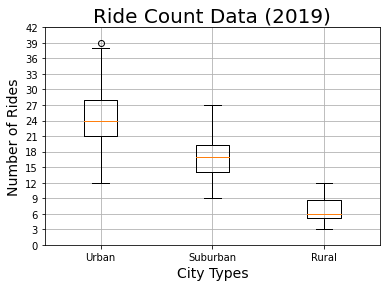

In [34]:
#create a box and whisker plot for urban cities ride count
x_labels=["Urban", "Suburban", "Rural"]
ride_count_data=[urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots()
ax.boxplot(ride_count_data, labels=x_labels)
#add the title, axis labes and grid
ax.set_title("Ride Count Data (2019)", fontsize=20)
ax.set_ylabel("Number of Rides", fontsize=14)
ax.set_xlabel("City Types", fontsize=14)
ax.set_yticks(np.arange(0,45, step=3))
ax.grid()
plt.savefig("Analysis/Fig2.png")
plt.show()

In [35]:
#Get the city that mathes 39
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count")

West Angela has the highest rider count


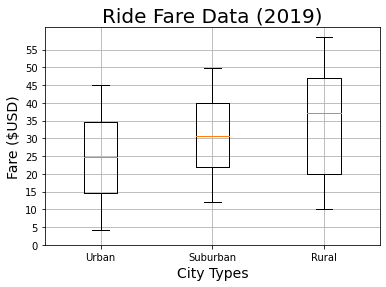

In [36]:
#create a box and whisker plot for the urban fare data
x_labels=["Urban", "Suburban", "Rural"]
fare_data=[urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots()
ax.boxplot(fare_data, labels=x_labels)
#add the title, axis labes and grid
ax.set_title("Ride Fare Data (2019)", fontsize=20)
ax.set_ylabel("Fare ($USD)", fontsize=14)
ax.set_xlabel("City Types", fontsize=14)
ax.set_yticks(np.arange(0,60, step=5))
ax.grid()
plt.savefig("Analysis/Fig3.png")
plt.show()

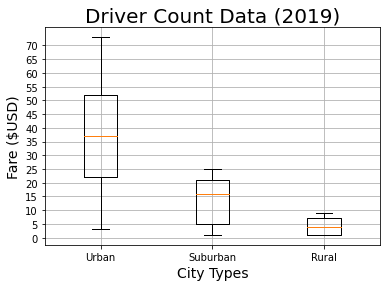

In [37]:
#create a box and whisker plot for the urban fare data
x_labels=["Urban", "Suburban", "Rural"]
driver_data=[urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots()
ax.boxplot(driver_data, labels=x_labels)
#add the title, axis labes and grid
ax.set_title("Driver Count Data (2019)", fontsize=20)
ax.set_ylabel("Fare ($USD)", fontsize=14)
ax.set_xlabel("City Types", fontsize=14)
ax.set_yticks(np.arange(0,75, step=5))
ax.grid()
plt.savefig("Analysis/Fig4.png")
plt.show()

In [38]:
#calculate the percentage of fare for each city type
type_percents = 100* pyber_data_df.groupby(["type"]).sum()["fare"]/pyber_data_df["fare"].sum()
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

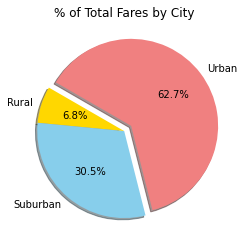

In [39]:
#import mpl to change plot configurations using rcParams
import matplotlib as mpl
#create pie chart
plt.pie(type_percents, 
        labels = ["Rural", "Suburban", "Urban"], 
        colors=["gold", "skyblue", "lightcoral"], 
        explode=[0,0,0.1], 
        autopct="%1.1f%%",
        shadow=True,
        startangle=150)
plt.title("% of Total Fares by City")
#change the default font size from 10 to 14
mpl.rcParams['font.size']=14
plt.savefig("Analysis/Fig5.png")
plt.show()

In [43]:
#calculate the number of rides by city type
ride_percents = 100 * pyber_data_df.groupby(["type"]).count()["ride_id"] / pyber_data_df["ride_id"].count()
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

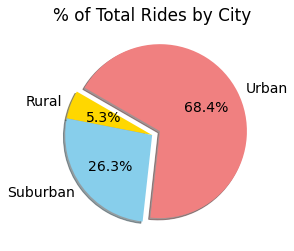

In [44]:
#create pie chart
plt.pie(ride_percents, 
        labels = ["Rural", "Suburban", "Urban"], 
        colors=["gold", "skyblue", "lightcoral"], 
        explode=[0,0,0.1], 
        autopct="%1.1f%%",
        shadow=True,
        startangle=150)
plt.title("% of Total Rides by City")
#change the default font size from 10 to 14
mpl.rcParams['font.size']=14
plt.savefig("Analysis/Fig6.png")
plt.show()

In [51]:
#calculate the number od rides by city type
driver_percents = 100 * city_data_df.groupby(["type"]).sum()["driver_count"] / city_data_df["driver_count"].sum()
driver_percents

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

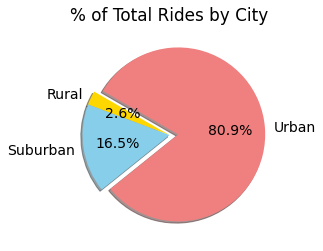

In [52]:
#create pie chart
plt.pie(driver_percents, 
        labels = ["Rural", "Suburban", "Urban"], 
        colors=["gold", "skyblue", "lightcoral"], 
        explode=[0,0,0.1], 
        autopct="%1.1f%%",
        shadow=True,
        startangle=150)
plt.title("% of Total Rides by City")
#change the default font size from 10 to 14
mpl.rcParams['font.size']=14
plt.savefig("Analysis/Fig7.png")
plt.show()